<a href="https://colab.research.google.com/github/JpChii/ML-Projects/blob/main/asl_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# American Sign Language computer vision

In this notebook, we'll try to creating a computer vision model for [ASL Dataset](https://www.kaggle.com/grassknoted/asl-alphabet) and achieve 90% accuracy.

We'll also load in data using three different methods and see how it impacts the training time of the models.

## Data Loading Methods
  * Image Data Generator
      1. With Data Augumentation
      2. Without Data Augumentaion
  * image_dataset_from_directory
      1. Data Augumentation using experimental
  * tf.data API

Will also checkout creating small datasets from full dataset images. Remeber it's better to start out with small expeiments find out what works and scale instead of going big at the beginning leading to big experimentaion time.

In [ ]:
# Let'sget our helper function
!wget https://raw.githubusercontent.com/JpChii/ML-Tools/main/dl_helper.py

--2021-05-11 07:36:30--  https://raw.githubusercontent.com/JpChii/ML-Tools/main/dl_helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17979 (18K) [text/plain]
Saving to: ‘dl_helper.py’

dl_helper.py        100%[===================>]  17.56K  --.-KB/s    in 0s      

2021-05-11 07:36:30 (124 MB/s) - ‘dl_helper.py’ saved [17979/17979]



In [ ]:
from dl_helper import unzip_data ,walk_through_dir

In [ ]:
unzip_data(filename="/content/drive/MyDrive/ML_data/asl.zip")

In [ ]:
# setup train and test directories
train_dir = "/content/asl_alphabet_train/asl_alphabet_train/"
test_dir = "/content/asl_alphabet_testasl_alphabet_test/"

In [ ]:
# Checking out the directory contents
walk_through_dir(train_dir)
walk_through_dir(test_dir)

There are 29 directories and 0 images in '/content/asl_alphabet_train/asl_alphabet_train/'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/P'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/W'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/B'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/Q'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/A'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/N'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/T'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/L'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/J'.
There are 0 directories and 3000 images in '/content/

Ther are 3000 images per class in training and 1 image per class in test data.

Before getting familiar with the data, let's create some functions to create percentage based dataset's to do small experiments.

Let's get the class names before that.

In [ ]:
from pathlib import Path
train_dir_path = Path(train_dir) # Creating a posix path

In [ ]:
class_names = []
for item in train_dir_path.glob('*'):
  class_names.append(item.parts[4])
class_names

['P',
 'W',
 'B',
 'Q',
 'A',
 'N',
 'T',
 'L',
 'J',
 'nothing',
 'E',
 'del',
 'Y',
 'C',
 'M',
 'F',
 'X',
 'space',
 'G',
 'U',
 'K',
 'D',
 'Z',
 'S',
 'I',
 'H',
 'R',
 'O',
 'V']

In [ ]:
import random, os
from tqdm.notebook import  tqdm
import shutil

In [ ]:
def get_percent_images(target_dir, new_dir, sample_amount=0.1, random_state=42):
  """
  Get  sample amount percentage of random images from target_dir and copy them to new_dir
  Args:
    target_dir (str) - file path of directory to extract images from
    new_dir (str) - new directory path to copy original images to
    sample_amount - Percentage of images to copy(eg 0.1 = 10%)
    random_state - random seed value
  """

  # Set random seed for reproducabality
  random.seed(random_state)

  # Get a list of dictionaries of images files in target_dir
  # eg -  [{"class_name":["2348348.jpg", "2829119.jpg"]}]
  images = [{dir_name: os.listdir(target_dir +  "/"+ dir_name)} for dir_name in os.listdir(target_dir)]
  for i in images:
    for k, v in i.items():
      # how many images to sample
      sample_number = round(int(len(v)*sample_amount))

      print(f"There are {len(v)} total images in '{target_dir+k}' so we're going to copay {sample_number} to the new directory.")
      print(f"Getting {sample_number} random images for {k}...")
      random_images = random.sample(v, sample_number)

      # Make new_dir for each key
      new_target_dir = new_dir + "/" + k
      print(f"Making dir: {new_target_dir}")
      os.makedirs(new_target_dir,exist_ok=True)

      # Keep track of images moved
      images_moved = []

      # Create file paths for original images and new file target
      print(f"Copying images from: {target_dir}\n\t \t to: {new_target_dir}")
      for filename in tqdm(random_images):
        og_path = target_dir + "/" + k + "/" + filename
        new_path = new_target_dir + "/" + filename

        # Copy images from OG path to new path
        shutil.copy2(og_path, new_path)
        images_moved.append(new_path)

        # Malke sure number of images moved is corect
      assert len(os.listdir(new_target_dir)) == sample_number
      assert len(images_moved) == sample_number

In [ ]:
get_percent_images(target_dir="/content/asl_alphabet_train/asl_alphabet_train",
                   new_dir="asl_10_percent",
                   sample_amount=0.1)

get_percent_images(target_dir="/content/asl_alphabet_train/asl_alphabet_train",
                   new_dir="asl_10_percent_test",
                   sample_amount=0.01)

There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainP' so we're going to copay 300 to the new directory.
Getting 300 random images for P...
Making dir: asl_10_percent/P
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/P



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainW' so we're going to copay 300 to the new directory.
Getting 300 random images for W...
Making dir: asl_10_percent/W
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/W



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainB' so we're going to copay 300 to the new directory.
Getting 300 random images for B...
Making dir: asl_10_percent/B
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/B



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainQ' so we're going to copay 300 to the new directory.
Getting 300 random images for Q...
Making dir: asl_10_percent/Q
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/Q



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainA' so we're going to copay 300 to the new directory.
Getting 300 random images for A...
Making dir: asl_10_percent/A
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/A



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainN' so we're going to copay 300 to the new directory.
Getting 300 random images for N...
Making dir: asl_10_percent/N
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/N



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainT' so we're going to copay 300 to the new directory.
Getting 300 random images for T...
Making dir: asl_10_percent/T
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/T



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainL' so we're going to copay 300 to the new directory.
Getting 300 random images for L...
Making dir: asl_10_percent/L
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/L



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainJ' so we're going to copay 300 to the new directory.
Getting 300 random images for J...
Making dir: asl_10_percent/J
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/J



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainnothing' so we're going to copay 300 to the new directory.
Getting 300 random images for nothing...
Making dir: asl_10_percent/nothing
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/nothing



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainE' so we're going to copay 300 to the new directory.
Getting 300 random images for E...
Making dir: asl_10_percent/E
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/E



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_traindel' so we're going to copay 300 to the new directory.
Getting 300 random images for del...
Making dir: asl_10_percent/del
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/del



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainY' so we're going to copay 300 to the new directory.
Getting 300 random images for Y...
Making dir: asl_10_percent/Y
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/Y



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainC' so we're going to copay 300 to the new directory.
Getting 300 random images for C...
Making dir: asl_10_percent/C
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/C



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainM' so we're going to copay 300 to the new directory.
Getting 300 random images for M...
Making dir: asl_10_percent/M
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/M



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainF' so we're going to copay 300 to the new directory.
Getting 300 random images for F...
Making dir: asl_10_percent/F
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/F



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainX' so we're going to copay 300 to the new directory.
Getting 300 random images for X...
Making dir: asl_10_percent/X
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/X



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainspace' so we're going to copay 300 to the new directory.
Getting 300 random images for space...
Making dir: asl_10_percent/space
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/space



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainG' so we're going to copay 300 to the new directory.
Getting 300 random images for G...
Making dir: asl_10_percent/G
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/G



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainU' so we're going to copay 300 to the new directory.
Getting 300 random images for U...
Making dir: asl_10_percent/U
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/U



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainK' so we're going to copay 300 to the new directory.
Getting 300 random images for K...
Making dir: asl_10_percent/K
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/K



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainD' so we're going to copay 300 to the new directory.
Getting 300 random images for D...
Making dir: asl_10_percent/D
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/D



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainZ' so we're going to copay 300 to the new directory.
Getting 300 random images for Z...
Making dir: asl_10_percent/Z
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/Z



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainS' so we're going to copay 300 to the new directory.
Getting 300 random images for S...
Making dir: asl_10_percent/S
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/S



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainI' so we're going to copay 300 to the new directory.
Getting 300 random images for I...
Making dir: asl_10_percent/I
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/I



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainH' so we're going to copay 300 to the new directory.
Getting 300 random images for H...
Making dir: asl_10_percent/H
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/H



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainR' so we're going to copay 300 to the new directory.
Getting 300 random images for R...
Making dir: asl_10_percent/R
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/R



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainO' so we're going to copay 300 to the new directory.
Getting 300 random images for O...
Making dir: asl_10_percent/O
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/O



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainV' so we're going to copay 300 to the new directory.
Getting 300 random images for V...
Making dir: asl_10_percent/V
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/V



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainP' so we're going to copay 30 to the new directory.
Getting 30 random images for P...
Making dir: asl_10_percent_test/P
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/P



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainW' so we're going to copay 30 to the new directory.
Getting 30 random images for W...
Making dir: asl_10_percent_test/W
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/W



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainB' so we're going to copay 30 to the new directory.
Getting 30 random images for B...
Making dir: asl_10_percent_test/B
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/B



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainQ' so we're going to copay 30 to the new directory.
Getting 30 random images for Q...
Making dir: asl_10_percent_test/Q
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/Q



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainA' so we're going to copay 30 to the new directory.
Getting 30 random images for A...
Making dir: asl_10_percent_test/A
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/A



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainN' so we're going to copay 30 to the new directory.
Getting 30 random images for N...
Making dir: asl_10_percent_test/N
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/N



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainT' so we're going to copay 30 to the new directory.
Getting 30 random images for T...
Making dir: asl_10_percent_test/T
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/T



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainL' so we're going to copay 30 to the new directory.
Getting 30 random images for L...
Making dir: asl_10_percent_test/L
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/L



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainJ' so we're going to copay 30 to the new directory.
Getting 30 random images for J...
Making dir: asl_10_percent_test/J
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/J



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainnothing' so we're going to copay 30 to the new directory.
Getting 30 random images for nothing...
Making dir: asl_10_percent_test/nothing
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/nothing



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainE' so we're going to copay 30 to the new directory.
Getting 30 random images for E...
Making dir: asl_10_percent_test/E
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/E



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_traindel' so we're going to copay 30 to the new directory.
Getting 30 random images for del...
Making dir: asl_10_percent_test/del
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/del



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainY' so we're going to copay 30 to the new directory.
Getting 30 random images for Y...
Making dir: asl_10_percent_test/Y
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/Y



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainC' so we're going to copay 30 to the new directory.
Getting 30 random images for C...
Making dir: asl_10_percent_test/C
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/C



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainM' so we're going to copay 30 to the new directory.
Getting 30 random images for M...
Making dir: asl_10_percent_test/M
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/M



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainF' so we're going to copay 30 to the new directory.
Getting 30 random images for F...
Making dir: asl_10_percent_test/F
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/F



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainX' so we're going to copay 30 to the new directory.
Getting 30 random images for X...
Making dir: asl_10_percent_test/X
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/X



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainspace' so we're going to copay 30 to the new directory.
Getting 30 random images for space...
Making dir: asl_10_percent_test/space
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/space



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainG' so we're going to copay 30 to the new directory.
Getting 30 random images for G...
Making dir: asl_10_percent_test/G
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/G



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainU' so we're going to copay 30 to the new directory.
Getting 30 random images for U...
Making dir: asl_10_percent_test/U
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/U



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainK' so we're going to copay 30 to the new directory.
Getting 30 random images for K...
Making dir: asl_10_percent_test/K
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/K



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainD' so we're going to copay 30 to the new directory.
Getting 30 random images for D...
Making dir: asl_10_percent_test/D
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/D



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainZ' so we're going to copay 30 to the new directory.
Getting 30 random images for Z...
Making dir: asl_10_percent_test/Z
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/Z



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainS' so we're going to copay 30 to the new directory.
Getting 30 random images for S...
Making dir: asl_10_percent_test/S
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/S



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainI' so we're going to copay 30 to the new directory.
Getting 30 random images for I...
Making dir: asl_10_percent_test/I
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/I



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainH' so we're going to copay 30 to the new directory.
Getting 30 random images for H...
Making dir: asl_10_percent_test/H
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/H



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainR' so we're going to copay 30 to the new directory.
Getting 30 random images for R...
Making dir: asl_10_percent_test/R
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/R



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainO' so we're going to copay 30 to the new directory.
Getting 30 random images for O...
Making dir: asl_10_percent_test/O
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/O



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainV' so we're going to copay 30 to the new directory.
Getting 30 random images for V...
Making dir: asl_10_percent_test/V
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/V


In [ ]:
walk_through_dir("/content/asl_10_percent")
walk_through_dir("/content/asl_10_percent_test")

There are 29 directories and 0 images in '/content/asl_10_percent'.
There are 0 directories and 300 images in '/content/asl_10_percent/P'.
There are 0 directories and 300 images in '/content/asl_10_percent/W'.
There are 0 directories and 300 images in '/content/asl_10_percent/B'.
There are 0 directories and 300 images in '/content/asl_10_percent/Q'.
There are 0 directories and 300 images in '/content/asl_10_percent/A'.
There are 0 directories and 300 images in '/content/asl_10_percent/N'.
There are 0 directories and 300 images in '/content/asl_10_percent/T'.
There are 0 directories and 300 images in '/content/asl_10_percent/L'.
There are 0 directories and 300 images in '/content/asl_10_percent/J'.
There are 0 directories and 300 images in '/content/asl_10_percent/nothing'.
There are 0 directories and 300 images in '/content/asl_10_percent/E'.
There are 0 directories and 300 images in '/content/asl_10_percent/del'.
There are 0 directories and 300 images in '/content/asl_10_percent/Y'.
T

Now we've got a function to get sample of images from total dataset.

let's get one with the data now

## Getting the data ready

In [ ]:
# Setting up 10 percent train directory
train_dir_10_percent = "/content/asl_10_percent"
test_dir_1_percent = "/content/asl_10_percent_test"

In [ ]:
import matplotlib.pyplot as plt
import os, random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def view_random_image(target_dir, classes):
  """
  Function to view random images in computer vision

  PreRequisite:
    Standard Computer vision directory structure

  Args:
    target_dir: Directory from wherer images are picked
    classes: list of classes
  """
  target_class = random.choice(classes)
  target_dir = target_dir + "/" + target_class
  target_image = random.choice(os.listdir(target_dir))
  img_path = target_dir + "/" + target_image

  loaded_image = load_img(img_path)
  image_array = img_to_array(loaded_image)

  plt.imshow(image_array/255.)
  plt.axis(False)
  plt.title(f"Class: {target_class}, Shape: {image_array.shape}")

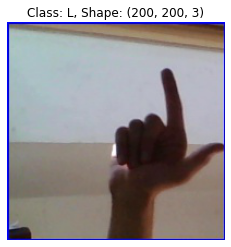

In [ ]:
view_random_image(target_dir=train_dir_10_percent,
                  classes=class_names)

In [ ]:
import matplotlib.pyplot as plt
import os, random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to view multiple images
def view_many_random_images(num_rows, num_cols, target_dir, classes):
  """
  To get one with the data, function to view multiple images using `view_random_image`

  PreRequisite:
  Standard Computer vision directory structure

  Args:
    num_rows: number of rows
    num_cols: number of columns
    target_dir: Directory from wherer images are picked
    classes: list of classes
    num_rows * num_images random images will be plotted
  """

  num_images = num_rows * num_cols
  plt.figure(figsize=(2*2*num_cols, 2*num_rows))
  for image in range(num_images):
    plt.subplot(num_rows, num_cols, image + 1)
    view_random_image(target_dir=target_dir,
                      classes=classes)

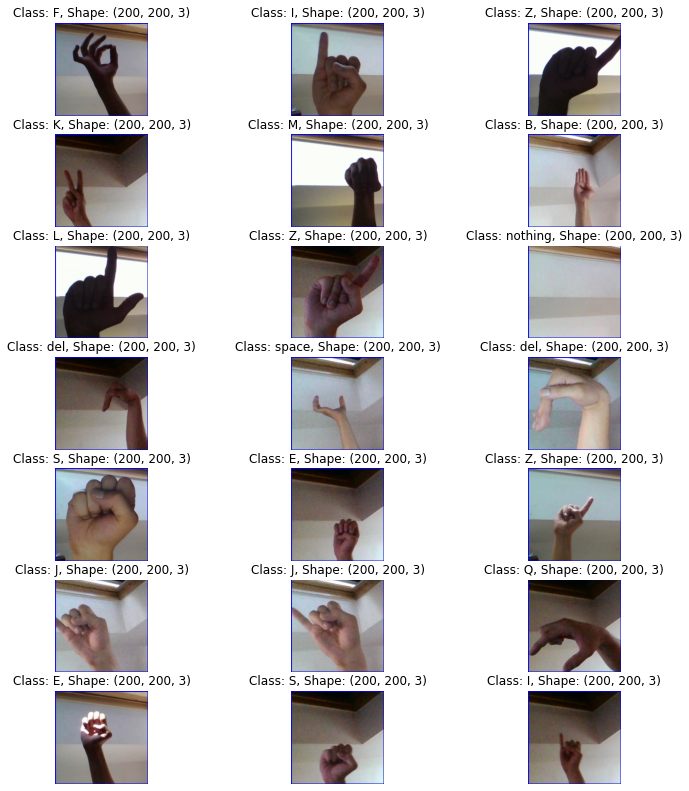

In [ ]:
view_many_random_images(num_rows=7,
                        num_cols=3,
                        target_dir=train_dir_10_percent,
                        classes=class_names)

After viewing many images using `view_multiple_random_images`, all the images are in `(200, 200, 3)` shape.

Next let's load the data in three different methods to check the impact on training time.

## 2. Loading the data

### 2.1 Using ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Setting up datagen instances
train_datagen_10_percent = ImageDataGenerator(rescale=1/255.)
test_datagen_1_percent = ImageDataGenerator(rescale=1/255.)

train_data_10_percent = train_datagen_10_percent.flow_from_directory(directory=train_dir_10_percent,
                                                                     target_size=(224, 224),
                                                                     class_mode='categorical',
                                                                     batch_size=32,
                                                                     shuffle=True)

test_data_1_percent = test_datagen_1_percent.flow_from_directory(directory=test_dir_1_percent,
                                                                     target_size=(224, 224),
                                                                     class_mode='categorical',
                                                                     batch_size=32)

Found 8700 images belonging to 29 classes.
Found 870 images belonging to 29 classes.


### 2.2 ImageDataGenerator using DataAugumentation

In [ ]:
# Setting up datagen instances
train_data_10_percent_aug = ImageDataGenerator(rescale=1/255.,
                                               horizontal_flip=True,
                                               zoom_range=0.2,
                                               rotation_range=0.2,
                                               width_shift_range=0.2,
                                               height_shift_range=0.2)

train_data_10_percent_aug = train_data_10_percent_aug.flow_from_directory(directory=train_dir_10_percent,
                                                                     target_size=(224, 224),
                                                                     class_mode='categorical',
                                                                     batch_size=32)

Found 8700 images belonging to 29 classes.


### 2.3 image_dataset_from_directory

In [ ]:
train_data_10_percent_idfd = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_10_percent,
                                                                                 label_mode='categorical',
                                                                                 image_size=(224,224),
                                                                                 batch_size=32,
                                                                                 shuffle=True)

test_data_1_percent_idfd = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir_1_percent,
                                                                                 label_mode='categorical',
                                                                                 image_size=(224,224),
                                                                                 batch_size=32)

Found 8700 files belonging to 29 classes.
Found 870 files belonging to 29 classes.


### 2.4 tf.data API

[Using this document](https://www.tensorflow.org/tutorials/load_data/images#using_tfdata_for_finer_control)

In [ ]:
# Getting the image count
train_dir_path_10_percent = Path("/content/asl_10_percent")
test_dir_path_1_percent = Path("/content/asl_10_percent_test")
image_count_train = len(list(train_dir_path_10_percent.glob('*/*.jpg')))
image_count_test = len(list(test_dir_path_1_percent.glob('*/*.jpg')))

In [ ]:
# Getting the list of files for train
train_ds = tf.data.Dataset.list_files(file_pattern=str(train_dir_path_10_percent/'*/*'), shuffle=False)
train_ds = train_ds.shuffle(buffer_size=1000, reshuffle_each_iteration=False)

In [ ]:
# Getting the list of files for test
test_ds = tf.data.Dataset.list_files(file_pattern=str(test_dir_path_1_percent/'*/*'), shuffle=False)
test_ds = test_ds.shuffle(buffer_size=1000, reshuffle_each_iteration=False)

In [ ]:
# Checking out the file list
for file in train_ds.take(5):
   print(file)

tf.Tensor(b'/content/asl_10_percent/D/D1702.jpg', shape=(), dtype=string)
tf.Tensor(b'/content/asl_10_percent/B/B2584.jpg', shape=(), dtype=string)
tf.Tensor(b'/content/asl_10_percent/B/B770.jpg', shape=(), dtype=string)
tf.Tensor(b'/content/asl_10_percent/A/A1434.jpg', shape=(), dtype=string)
tf.Tensor(b'/content/asl_10_percent/C/C2735.jpg', shape=(), dtype=string)


In [ ]:
import numpy as np
# Writing a short function to return image and label to map over all the images
def get_label(file_path):
  part = tf.strings.split(file_path, os.path.sep)

  # One hot encode the label
  one_hot = part[-1] == class_names
  return tf.one_hot(tf.argmax(one_hot), 29)

def decode_image(img):
  # Convert the compressed string to a uint8 tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image to desired shape
  return tf.image.resize(img, [img_size, img_size])

def process_path(file_path):
  label = get_label(file_path)
  img = tf.io.read_file(file_path)
  img = decode_image(img)

  return img, label

In [ ]:
get_label("/content/asl_10_percent/A/A101.jpg")

<tf.Tensor: shape=(29,), dtype=float32, numpy=
array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

Now we've written the functions for preprocessing, let's load in the data.

In [ ]:
# Train
img_size = 224
train_data_10_percent_da = train_ds.map(map_func=process_path,
                                       num_parallel_calls=tf.data.AUTOTUNE)

train_data_10_percent_da = train_data_10_percent_da.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
# Test
img_size = 224
test_data_1_percent_da = test_ds.map(map_func=process_path,
                                       num_parallel_calls=tf.data.AUTOTUNE)

test_data_1_percent_da = test_data_1_percent_da.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

Now training loaded in three different methods are available, let's check out one sample data from all three methods and proceed with modelling.

In [ ]:
# ImageDataGenerator
train_1s_idg = train_data_10_percent.next()
for i in train_1s_idg:
 print(i.shape)
 print(i[0])

(32, 224, 224, 3)
[[[0.         0.00784314 0.98823535]
  [0.00392157 0.02352941 1.        ]
  [0.         0.         0.98823535]
  ...
  [0.03137255 0.         1.        ]
  [0.00392157 0.00392157 1.        ]
  [0.         0.01176471 0.98823535]]

 [[0.01568628 0.01176471 1.        ]
  [0.00392157 0.         0.89019614]
  [0.05490196 0.03529412 0.7803922 ]
  ...
  [0.04705883 0.00784314 0.7254902 ]
  [0.02352941 0.02352941 0.79215693]
  [0.         0.03137255 0.90196085]]

 [[0.01568628 0.         0.9921569 ]
  [0.04705883 0.00392157 0.7803922 ]
  [0.34509805 0.31764707 0.69411767]
  ...
  [0.7490196  0.7176471  0.86274517]
  [0.75294125 0.74509805 1.        ]
  [0.02352941 0.04705883 0.77647066]]

 ...

 [[0.01960784 0.         1.        ]
  [0.03921569 0.02745098 0.72156864]
  [0.30980393 0.32156864 0.48235297]
  ...
  [0.58431375 0.53333336 0.45882356]
  [0.54901963 0.5137255  0.7686275 ]
  [0.03921569 0.01960784 0.7294118 ]]

 [[0.         0.         0.9843138 ]
  [0.03921569 0.035

The image is in `(32, 224, 224, 3)` shape and label is in `(32, 39)` shape.
Labels are one-hot encoded in ImageDataGenerator.


In [ ]:
# image_dataset_from_directory
train_1s_idfd = train_data_10_percent_idfd.take(1)
for i, l in train_1s_idfd:
  print(f"Shape of the image: {i.shape,}")
  print(f"Shape of the label: {l.shape}")
  print(f"Image : {i[0]}")
  print(f"Label: {l[0]}")

Shape of the image: (TensorShape([32, 224, 224, 3]),)
Shape of the label: (32, 29)
Image : [[[  0.           0.         245.        ]
  [  0.           0.83928573 245.        ]
  [  0.           0.2678572  236.21428   ]
  ...
  [  4.3928833    0.         237.73215   ]
  [  0.           0.4821167  237.80353   ]
  [  0.           3.         242.        ]]

 [[  0.           4.196429   250.875     ]
  [  0.           0.80931115 233.26498   ]
  [  1.8434309    3.1154337  212.50447   ]
  ...
  [ 11.391909     4.481168   203.68105   ]
  [  8.452894     6.5520315  217.96045   ]
  [  0.           1.3214285  219.33928   ]]

 [[  0.           1.339286   243.21428   ]
  [  1.843431     1.4441963  214.24394   ]
  [ 44.59534     46.93558    199.84535   ]
  ...
  [ 58.700294    51.255127   170.18892   ]
  [ 45.253845    40.347263   197.047     ]
  [ 12.446427     9.053571   184.98215   ]]

 ...

 [[  2.4642944    0.80355835 244.        ]
  [  4.7573466    4.325572   206.47188   ]
  [  9.8769455   12

The image is in `(32, 224, 224, 3)` shape and label is in `(32, 39)` shape.
Labels are one-hot encoded in image_dataset_from_directory.

In [ ]:
# tf.data
train_1s_da = train_data_10_percent_da.take(1)
for i, l in train_1s_da:
  print(f"Shape of the image: {i.shape,}")
  print(f"Shape of the label: {l.shape}")
  print(f"Image : {i[0]}")
  print(f"Label: {l[0]}")

Shape of the image: (TensorShape([32, 224, 224, 3]),)
Shape of the label: (32, 29)
Image : [[[  0.           0.         249.        ]
  [  0.           0.         245.64285   ]
  [  0.7321428    0.         239.14285   ]
  ...
  [  7.660736     0.         243.80356   ]
  [  4.           0.         246.32141   ]
  [  4.           0.         248.        ]]

 [[  0.           0.         246.48215   ]
  [  0.           0.         233.26338   ]
  [  6.262436     1.8434309  210.74203   ]
  ...
  [  9.683981     0.67441505 201.97408   ]
  [ 10.6094265    2.1132236  219.16449   ]
  [  5.6785717    0.         223.66072   ]]

 [[  1.4642856    0.7321428  243.07143   ]
  [  5.1511474    1.9610969  209.52997   ]
  [ 67.85394     59.604267   201.85204   ]
  ...
  [ 74.1993      64.59152    178.61522   ]
  [ 62.82481     53.964455   208.46043   ]
  [ 13.321428     6.5892854  180.92857   ]]

 ...

 [[  0.           0.         238.87497   ]
  [  0.           1.2289615  199.60835   ]
  [145.1081     152

The image is in `(32, 224, 224, 3)` shape and label is in `(32, 39)` shape.
Labels are one-hot encoded in image_dataset_from_directory.

Okay all three data loading techniques have the same image and label shape. Now let's build a model and compare the impact of a good input pipeline on the training time.

In [ ]:
# Building the model
from tensorflow.keras import layers
inputs = layers.Input(shape=(224,224,3), name="input_layer")
x = layers.Conv2D(filters=10,
                  kernel_size=(3,3),
                  strides=(1,1),
                  padding='valid',
                  name="conv1_layer")(inputs)
x = layers.MaxPool2D(pool_size=(2,2),
                     strides=(1,1),
                     padding='valid',
                    name="maxpool1_layer")(x)
x = layers.Dropout(rate=0.5, name="dropout1_layer")(x)
x = layers.Conv2D(filters=10,
                  kernel_size=(3,3),
                  strides=(1,1),
                  padding='valid',
                  name="conv2_layer")(x)
x = layers.MaxPool2D(pool_size=(2,2),
                     strides=(1,1),
                     padding='valid',
                    name="maxpool2_layer")(x)
x = layers.Dropout(rate=0.5, name="dropout2_layer")(x)
x = layers.Flatten(name="faltten_layer")(x)
outputs = layers.Dense(len(class_names), activation="softmax", name="output_layer")(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_layer (Conv2D)         (None, 222, 222, 10)      280       
_________________________________________________________________
maxpool1_layer (MaxPooling2D (None, 221, 221, 10)      0         
_________________________________________________________________
dropout1_layer (Dropout)     (None, 221, 221, 10)      0         
_________________________________________________________________
conv2_layer (Conv2D)         (None, 219, 219, 10)      910       
_________________________________________________________________
maxpool2_layer (MaxPooling2D (None, 218, 218, 10)      0         
_________________________________________________________________
dropout2_layer (Dropout)     (None, 218, 218, 10)      0     

That's a lot of trainable parameters :|. Let's see how this model goes on the data in a CPU.

In [ ]:
# Compile the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
!pip install ipython-autotime

%load_ext autotime

time: 933 µs (started: 2021-05-11 07:37:27 +00:00)


In [ ]:
# Compile the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_idg = model.fit(train_data_10_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_10_percent),
                        validation_data=test_data_1_percent)

Epoch 1/5
272/272 [==============================] - 53s 74ms/step - loss: 47.9640 - accuracy: 0.0810 - val_loss: 142.6708 - val_accuracy: 0.0345
Epoch 2/5
272/272 [==============================] - 19s 71ms/step - loss: 2.4485 - accuracy: 0.3263 - val_loss: 65.6017 - val_accuracy: 0.0345
Epoch 3/5
272/272 [==============================] - 19s 70ms/step - loss: 1.4894 - accuracy: 0.5497 - val_loss: 31.5041 - val_accuracy: 0.0345
Epoch 4/5
272/272 [==============================] - 19s 71ms/step - loss: 1.0522 - accuracy: 0.6759 - val_loss: 19.4427 - val_accuracy: 0.0356
Epoch 5/5
272/272 [==============================] - 20s 72ms/step - loss: 0.7023 - accuracy: 0.7896 - val_loss: 14.9064 - val_accuracy: 0.0425
time: 2min 10s (started: 2021-05-11 07:37:27 +00:00)


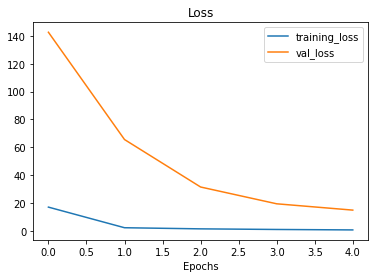

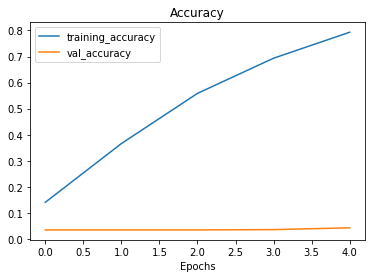

time: 346 ms (started: 2021-05-11 07:39:37 +00:00)


In [ ]:
from dl_helper import plot_loss_curves
plot_loss_curves(history_idg)

In [ ]:
# Compile the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_idg_da_aug = model.fit(train_data_10_percent_aug,
                        epochs=5,
                        steps_per_epoch=len(train_data_10_percent_aug),
                        validation_data=test_data_1_percent)

Epoch 1/5
272/272 [==============================] - 97s 355ms/step - loss: 7.3733 - accuracy: 0.0722 - val_loss: 6.2558 - val_accuracy: 0.0690
Epoch 2/5
272/272 [==============================] - 99s 362ms/step - loss: 3.6674 - accuracy: 0.0963 - val_loss: 7.6483 - val_accuracy: 0.0506
Epoch 3/5
272/272 [==============================] - 97s 356ms/step - loss: 3.3884 - accuracy: 0.1005 - val_loss: 6.1553 - val_accuracy: 0.0494
Epoch 4/5
272/272 [==============================] - 97s 356ms/step - loss: 3.2997 - accuracy: 0.1159 - val_loss: 9.3112 - val_accuracy: 0.0368
Epoch 5/5
272/272 [==============================] - 98s 361ms/step - loss: 3.2603 - accuracy: 0.1220 - val_loss: 4.8603 - val_accuracy: 0.0540
time: 8min 7s (started: 2021-05-11 07:39:37 +00:00)


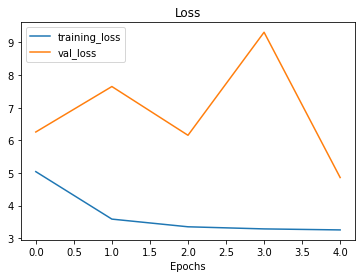

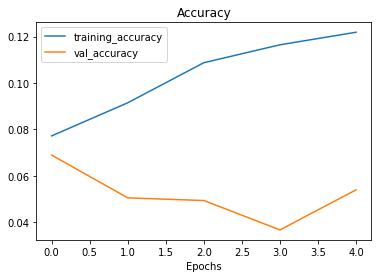

time: 363 ms (started: 2021-05-11 07:47:45 +00:00)


In [ ]:
from dl_helper import plot_loss_curves
plot_loss_curves(history_idg_da_aug)

In [ ]:
# Compile the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_idfd = model.fit(train_data_10_percent_idfd,
                        epochs=5,
                        steps_per_epoch=len(train_data_10_percent_idfd),
                         validation_data=test_data_1_percent_idfd)

Epoch 1/5
272/272 [==============================] - 25s 89ms/step - loss: 269.8886 - accuracy: 0.3051 - val_loss: 594.6080 - val_accuracy: 0.1368
Epoch 2/5
272/272 [==============================] - 25s 89ms/step - loss: 69.9438 - accuracy: 0.5992 - val_loss: 447.9839 - val_accuracy: 0.1690
Epoch 3/5
272/272 [==============================] - 24s 88ms/step - loss: 49.3968 - accuracy: 0.6918 - val_loss: 549.7187 - val_accuracy: 0.1356
Epoch 4/5
272/272 [==============================] - 24s 87ms/step - loss: 32.5814 - accuracy: 0.7680 - val_loss: 680.4979 - val_accuracy: 0.1092
Epoch 5/5
272/272 [==============================] - 24s 88ms/step - loss: 27.4961 - accuracy: 0.7994 - val_loss: 367.1905 - val_accuracy: 0.2356
time: 2min 2s (started: 2021-05-11 07:47:45 +00:00)


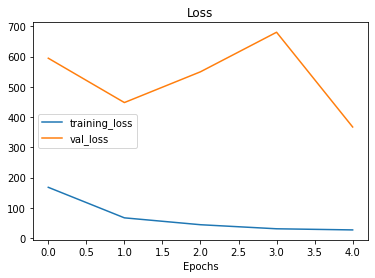

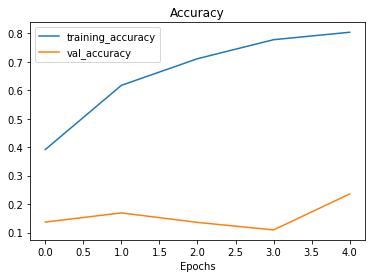

time: 581 ms (started: 2021-05-11 07:49:47 +00:00)


In [ ]:
from dl_helper import plot_loss_curves
plot_loss_curves(history_idfd)

In [ ]:
# Compile the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
# Fit the model
history_da = model.fit(train_data_10_percent_da,
                        epochs=5,
                        steps_per_epoch=len(train_data_10_percent_da),
                       validation_data=test_data_1_percent_da)

Epoch 1/5
272/272 [==============================] - 16s 54ms/step - loss: 14.0200 - accuracy: 0.9728 - val_loss: 42035.8281 - val_accuracy: 0.0000e+00
Epoch 2/5
272/272 [==============================] - 16s 53ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 42035.8242 - val_accuracy: 0.0000e+00
Epoch 3/5
272/272 [==============================] - 16s 54ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 42035.8242 - val_accuracy: 0.0000e+00
Epoch 4/5
272/272 [==============================] - 16s 53ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 42035.8242 - val_accuracy: 0.0000e+00
Epoch 5/5
272/272 [==============================] - 16s 53ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 42035.8242 - val_accuracy: 0.0000e+00
time: 1min 18s (started: 2021-05-11 07:49:48 +00:00)


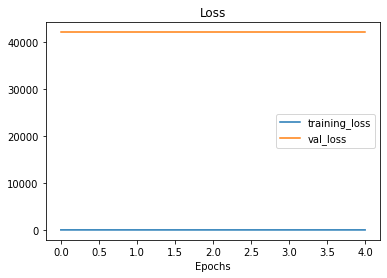

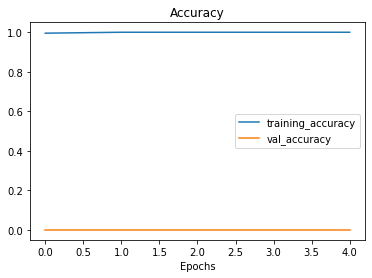

time: 345 ms (started: 2021-05-11 07:51:07 +00:00)


In [ ]:
from dl_helper import plot_loss_curves
plot_loss_curves(history_da)

For 8700 images for 29 classes,

The trainig time is listed from smallest to largest,
  1. tf.data - `1min 8s`
  2. ImageDataGenerator - `1min 29s`
  3. image_dataset_from_directory - `1min 51s`
  4. ImageDataGenerator with data augumentation - `7min 57s`

`tf.data` API we've used prefetch, what it does is while batching of data is happening, it prefetches the data for next batch, reducing the loading time and in turn training time compared to other methods.

`ImageDataGenerator with data_aumentation` takes the most time, becuase augumentaion is done in CPU during runtime and trained in GPU. But out of all the methods this gave the better performance on validation data.

For 1 and 3, we can add data augumentation as a layer in our model using `tf.keras.preprocessing.experimental`.

In [ ]:
272 * 32

8704

time: 5.35 ms (started: 2021-05-11 07:51:07 +00:00)


In [ ]:
300*29

8700

time: 3.49 ms (started: 2021-05-11 07:51:07 +00:00)
